Updated QCCC trial using DWave Simulated Annealing `neal` library and improved ast to networkx tree graph conversion.
7th May 2022

#### Imports

In [1]:
""" General in-built Python Libraries """
import sys # The sys module in Python provides various functions and variables 
# that are used to manipulate different parts of the Python runtime environment. 
# It allows operating on the interpreter as it provides access to the variables 
# and functions that interact strongly with the interpreter.
import random
import json
from collections import defaultdict # Python’s collections module provides a rich 
# set of specialized container data types carefully designed to approach specific 
# programming problems in a Pythonic and efficient way. The module also provides 
# wrapper classes that make it safer to create custom classes that behave similar 
# to the built-in types dict, list, and str.
import tokenize # The tokenize module provides a lexical scanner for Python 
# source code, implemented in Python. The scanner in this module returns comments
# as tokens as well, making it useful for implementing “pretty-printers”, 
# including colorizers for on-screen displays.
import numbers
import re
import uuid # This module provides immutable UUID objects (the UUID class) and 
# the functions uuid1(), uuid3(), uuid4(), uuid5() for generating version 
# 1, 3, 4, and 5 UUIDs as specified in RFC 4122.
from uuid import uuid4 as uuid
import subprocess # is a module used to run new codes and applications by 
# creating new processes. It lets you start new applications right from the 
# Python program you are currently writing.The subprocess module allows you to
#  spawn new processes, connect to their input/output/error pipes, and obtain 
# their return codes. 
import optparse # Optparse module makes easy to write command-line tools. 
# It allows argument parsing in the python program. It allows dynamic data 
# input to change the output
#import sh # sh is a full-fledged subprocess replacement that allows you to 
# call any program as if it were a function:
import inspect # inspect is useful in inspecting certain moduules and get a 
# detailed analysis of certain function calls or tracebacks so that debugging 
# can be easier.
import importlib

""" Python Libraries for generating, visiting and manipulating ASTs """
import ast # Python's In-Built AST Library
from astmonkey import visitors, transformers # astmonkey is a set of tools to 
# play with Python AST.
from astmonkey.visitors import GraphNodeVisitor
import astor # astor is designed to allow easy manipulation of Python source 
# via the AST
from _ast import AST
import astunparse # An AST unparser for Python.


""" Python libraries to visualize and display ASTs """
import astpretty # Pretty print the output of python stdlib ast.parse. 
# astpretty is intended to be a replacement for ast.dump.
import showast # # showast An IPython/Jupyter notebook plugin for 
# visualizing abstract syntax trees.
import graphviz as gv
from graphviz import Digraph, Graph # This package facilitates the creation and rendering of graph 
# descriptions in the DOT language of the Graphviz graph drawing software (upstream repo) 
# from Python. Create a graph object, assemble the graph by adding nodes and edges, and 
# retrieve its DOT source code string. Save the source code to a file and render it with the 
# Graphviz installation of your system.
from pprint import pprint # The pprint module provides a capability to “pretty-print” 
# arbitrary Python data structures in a form which can be used as input to the interpreter
import pydot # is an interface to Graphviz, it can parse and dump into the DOT language used by GraphViz
#import pydot_ng as pydot
from IPython.display import Image, display
import pprint
import matplotlib.pyplot as plt
import networkx as nx
from networkx.drawing.nx_agraph import write_dot, graphviz_layout
import pydotplus
import ast
import networkx as nx  
import sys
from graphviz import Digraph
import showast
import astpretty
import gsgmorph.pyqubo_form as gsgm_pqf
import pprint
import matplotlib.pyplot as plt  


#### The pieces of code whose AST needs to be generated

##### Code #1

In [3]:
graph_1_file_url = '/Users/samyakjhaveri/Desktop/Drive Folder/Research/Quantum Code Clone Detection Project/Code to Networkx Graph/test clone types/test_type_2_clones/test_type_2_a.py'
with open(graph_1_file_url, 'r') as fin1:
    src1 = fin1.read()
fin1.close()

##### Code #2

In [4]:
graph_2_file_url = '/Users/samyakjhaveri/Desktop/Drive Folder/Research/Quantum Code Clone Detection Project/Code to Networkx Graph/test clone types/test_type_2_clones/test_type_2_b.py'
with open(graph_2_file_url, 'r') as fin2:
    src2 = fin2.read()
fin2.close()

Translating to their respective ASTs

In [5]:
node1 = ast.parse(src1)
node2 = ast.parse(src2)


#### Option 2
Found new code to express ast as network_x <br>
This approach converts graphviz graph into network_x graph. So, here we can use one of the ast walkers from `1_code_to_ast.ipynb` that use the graphviz library to visualize the ast. <br>
Reference for expressing graphviz graph as network_x tree graph: https://stackoverflow.com/questions/11479624/is-there-a-way-to-guarantee-hierarchical-output-from-networkx/11484144#11484144

In [6]:
# Using GraphViz
def visit(node, nodes, pindex, g):
    """ Function to visit the nodes of the AST """

    #print(f"pindex: {pindex}")
    
    name = str(type(node).__name__)
    #print(f"name:{name}")
    
    index = len(nodes)
    #print(f"index: {index}")

    nodes.append(index)
    #print(f"nodes: {nodes}")

    g.node(str(index), name)
    #print(f"g: {g}")

    if index != pindex: # check to see if there is  
        g.edge(str(index), str(pindex))
    
    for n in ast.iter_child_nodes(node):
        visit(n, nodes, index, g) # recursively traverse the AST to go over the nodes and register them into the graph
    


Turning ASTs into Graphiz Graphs


In [7]:
gv_graph1 = Digraph(format = "png") # declaring GraphViz Graph
visit(node1, [], 0, gv_graph1)
gv_graph1.render("node1_ast_gv_visualized") # renders the graph obtained

'node1_ast_gv_visualized.png'

In [8]:
gv_graph2 = Digraph(format = "png") # declaring GraphViz Graph
visit(node2, [], 0, gv_graph2)
gv_graph2.render("node2_ast_gv_visualized") # renders the graph obtained

'node2_ast_gv_visualized.png'

Checking the conversion by scheing the type

In [9]:
print(type(gv_graph1))

<class 'graphviz.graphs.Digraph'>


In [10]:
print(type(gv_graph2))

<class 'graphviz.graphs.Digraph'>


In [11]:
# reference: https://devdreamz.com/question/272682-convert-graphviz-dot-digraph-to-networkx-graph


Covnerting GraphViz grapoh into dot graph 

In [12]:
dotplus1 = pydotplus.graph_from_dot_data(gv_graph1.source)

In [13]:
dotplus2 = pydotplus.graph_from_dot_data(gv_graph2.source)

Checking type of resulint graphs to verify conversion

In [14]:
print(type(dotplus1))

<class 'pydotplus.graphviz.Dot'>


In [15]:
print(type(dotplus2))

<class 'pydotplus.graphviz.Dot'>


Converting dot graph into networkx graph

In [16]:
nx_of_graph1 = nx.nx_pydot.from_pydot(dotplus1)

In [17]:
nx_of_graph2 = nx.nx_pydot.from_pydot(dotplus2)

Checing type to verify resulting conversion

In [18]:
print(type(nx_of_graph1))

<class 'networkx.classes.multidigraph.MultiDiGraph'>


In [19]:
print(type(nx_of_graph2))

<class 'networkx.classes.multidigraph.MultiDiGraph'>


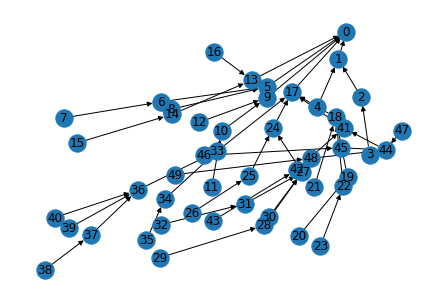

In [20]:
nx.draw(nx_of_graph1, with_labels = True)

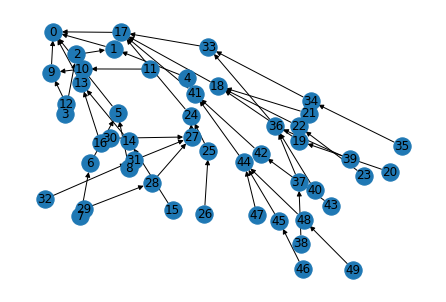

In [21]:
nx.draw(nx_of_graph2, with_labels = True)

In [22]:
print(nx_of_graph1.number_of_edges())
print(nx_of_graph2.number_of_edges())


49
49


In [23]:
print(nx_of_graph1.number_of_nodes())
print(nx_of_graph2.number_of_nodes())

50
50


### Now starts the Quantum Anneling part!

**Note for Benchmarking**:
Some benchmarking was conducted against Richard Hua's graph isomorphism QUBO generator and G/SG Morph's matrix_form implementation using Erdos-Renyi graphs in Google Colab. The results and techniques can be found in the Benchmarking folder.



#### Graph Isomorphism

In [24]:
# Get the PyQUBO expression and translation dictionary which allows us to 
# translate from the annealer results to the actual node mapping
pyqubo_exp, sample_translation_dict = gsgm_pqf.graph_isomorphism(nx_of_graph1, nx_of_graph2) #graph_1_graph, graph_2_graph)
# The pyqubo_exp is the qubo formulation that gsgmorph comes up with when the networkx graphs are passes to it. 
# thesample_translation_dict is the dictionary that is in conjunction with a sample from an annealer and can be translated
# into a dictionary that maps nodes from the graph-to-embed to the target-graph with the help of translate_sample()

#### Sub Graph Isomorphism

In [25]:
if nx_of_graph1.number_of_nodes() < nx_of_graph2.number_of_nodes():
    pyqubo_exp, sample_translation_dict = gsgm_pqf.subgraph_isomorphism(nx_of_graph1, nx_of_graph2)
elif nx_of_graph1.number_of_nodes() > nx_of_graph2.number_of_nodes():
    pyqubo_exp, sample_translation_dict = gsgm_pqf.subgraph_isomorphism(nx_of_graph2, nx_of_graph1)


In [26]:
import neal

# Initiate the annealer
sampler = neal.SimulatedAnnealingSampler()

# Convert the PyQUBO expression to a BQM that can be fed to the annealer
model = pyqubo_exp.compile()
bqm = model.to_bqm()

# Obtain smaples from annealing and choose the one with the lowest energy
# Keep in mind that there exist multiple satisfactory, low-energy solutions!
sampleset = sampler.sample(bqm, num_reads = 100)
decoded_samples = model.decode_sampleset(sampleset)
best_sample = min(decoded_samples, key = lambda x: x.energy)

In [27]:
print(sampleset)
print("Sample Set type:", type(sampleset))

   x[0][0] x[0][10] x[0][11] x[0][12] x[0][13] ... x[9][9] energy num_oc.
0        0        0        0        0        0 ...       0   12.0       1
1        0        0        0        0        0 ...       0   13.0       1
2        0        0        0        0        0 ...       0   14.0       1
3        0        0        0        0        0 ...       0   14.0       1
4        0        0        0        0        0 ...       0   14.0       1
5        0        0        0        0        0 ...       0   14.0       1
6        0        0        0        0        0 ...       0   14.0       1
7        1        0        0        0        0 ...       0   14.0       1
8        1        0        0        0        0 ...       0   14.0       1
9        1        0        0        0        0 ...       0   14.0       1
10       0        0        0        0        0 ...       0   15.0       1
11       0        0        0        0        0 ...       0   15.0       1
12       0        0        0        0 

In [28]:
print(best_sample)

In [29]:
print(sample_translation_dict)

{'x[0][0]': ('0', '0'), 'x[0][1]': ('0', '1'), 'x[0][2]': ('0', '2'), 'x[0][3]': ('0', '3'), 'x[0][4]': ('0', '4'), 'x[0][5]': ('0', '5'), 'x[0][6]': ('0', '6'), 'x[0][7]': ('0', '7'), 'x[0][8]': ('0', '8'), 'x[0][9]': ('0', '9'), 'x[0][10]': ('0', '10'), 'x[0][11]': ('0', '11'), 'x[0][12]': ('0', '12'), 'x[0][13]': ('0', '13'), 'x[0][14]': ('0', '14'), 'x[0][15]': ('0', '15'), 'x[0][16]': ('0', '16'), 'x[0][17]': ('0', '17'), 'x[0][18]': ('0', '18'), 'x[0][19]': ('0', '19'), 'x[0][20]': ('0', '20'), 'x[0][21]': ('0', '21'), 'x[0][22]': ('0', '22'), 'x[0][23]': ('0', '23'), 'x[0][24]': ('0', '24'), 'x[0][25]': ('0', '25'), 'x[0][26]': ('0', '26'), 'x[0][27]': ('0', '27'), 'x[0][28]': ('0', '28'), 'x[0][29]': ('0', '29'), 'x[0][30]': ('0', '30'), 'x[0][31]': ('0', '31'), 'x[0][32]': ('0', '32'), 'x[0][33]': ('0', '33'), 'x[0][34]': ('0', '34'), 'x[0][35]': ('0', '35'), 'x[0][36]': ('0', '36'), 'x[0][37]': ('0', '37'), 'x[0][38]': ('0', '38'), 'x[0][39]': ('0', '39'), 'x[0][40]': ('0', '

In [30]:
# We can use the PyQUBO-translated sample and the sample tranclation dictionary
# from before to generate a dictionary that maps nodes from the graph to be embedded
# and the target graph
mapping = gsgm_pqf.translate_sample(best_sample, sample_translation_dict)

In [31]:
mapping

{'9': '13',
 '6': '36',
 '4': '19',
 '49': '47',
 '5': '33',
 '47': '10',
 '46': '46',
 '45': '45',
 '48': '44',
 '43': '4',
 '41': '0',
 '40': '20',
 '39': '26',
 '35': '32',
 '21': '12',
 '30': '21',
 '33': '27',
 '2': '22',
 '29': '29',
 '28': '28',
 '31': '5',
 '26': '43',
 '37': '2',
 '25': '42',
 '15': '38',
 '8': '34',
 '20': '49',
 '19': '48',
 '1': '18',
 '13': '24',
 '10': '14',
 '42': '1',
 '14': '37',
 '7': '39',
 '32': '8',
 '38': '3',
 '22': '6',
 '23': '7',
 '0': '17',
 '3': '23',
 '16': '25',
 '34': '31',
 '11': '15',
 '24': '41',
 '12': '16'}

50
50
MultiDiGraph named 'G' with 45 nodes and 49 edges


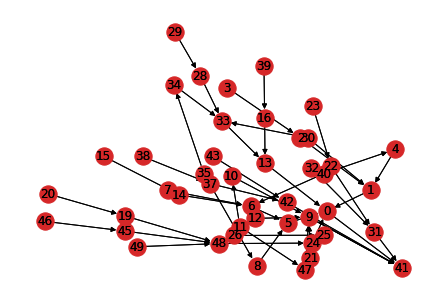

In [32]:
# We can use NetworkX to visualize the subgraph and how it fits onto the target graph

# Invert the mapping so it is from the target graph to the graph_to_embed nodes
inv_mapping = {v: k for k, v in mapping.items()}
print(nx_of_graph1.number_of_nodes())
print(nx_of_graph2.number_of_nodes())

# relabel those nodes in the target graph wit hthe node labels from the graph to embed
if nx_of_graph1.number_of_nodes() < nx_of_graph2.number_of_nodes():
        updated_nodes = nx.relabel_nodes(nx_of_graph2, inv_mapping, copy = True)
elif nx_of_graph1.number_of_nodes() > nx_of_graph2.number_of_nodes():
        updated_nodes = nx.relabel_nodes(nx_of_graph1, inv_mapping, copy = True)
else:
        updated_nodes = nx.relabel_nodes(nx_of_graph2, inv_mapping, copy = True)


print(updated_nodes)
# Get the same fixed position used before
pos = nx.spring_layout(updated_nodes, seed = 9999)

# Highlight the nodes that have been relabeled
nx.draw(updated_nodes, 
        pos, 
        with_labels = True, 
        font_color = 'black', 
        nodelist = [key for key in mapping.keys()],
        node_color = "tab:red")
# Difference between the two lists
nx.draw(updated_nodes, 
        pos, 
        with_labels = True, 
        font_color = 'black', 
        nodelist = list(set(updated_nodes.nodes()) - set(mapping.keys())), 
        node_color = "tab:blue")

#### Calculating Similarity Value

Using CP-Miner's Similarity Formula: Similarity

$ Similarity(T_{1}, T_{2}) = \frac{2H}{2H + L + R} $

Where <br>
$T_{1}$ and $T_{2}$ are the ASTs of the two codes, <br>
$H$ is the number of nodes that are common in both the ASTs, <br>
$L$ is the number of nodes that are different in $T_{1}$, and <br>
$R$ is the number of nodes that are different in $T_{2}$

In [33]:
print(nx_of_graph1)
print(nx_of_graph2)

MultiDiGraph named 'G' with 50 nodes and 49 edges
MultiDiGraph named 'G' with 50 nodes and 49 edges


In [34]:
print(updated_nodes)
print(type(updated_nodes))

MultiDiGraph named 'G' with 45 nodes and 49 edges
<class 'networkx.classes.multidigraph.MultiDiGraph'>


In [35]:
print(list(set(updated_nodes.nodes()) - set(mapping.keys())))

[]


In [36]:
print(len(mapping))

45


In [37]:
H = len(mapping)
L = len(list(set(updated_nodes.nodes()) - set(mapping.keys())))
R = abs(nx_of_graph2.number_of_nodes() - len(mapping))
print("H = ", H)
print("L = ", L)
print("R = ", R)

H =  45
L =  0
R =  5


In [38]:
S = (2 * H) / ((2 * H) + L + R)
print("Similarity = ", S)

Similarity =  0.9473684210526315


Similarity Values detected: <br>

- For Type 1 Clones: 0.9473684210526315
- For Type 2 Clones: 0.9473684210526315
- For Type 3 Clones: 0.9318181818181818
- For Type 4 Clones: 0.9230769230769231